# __Checking  the data!__

- __outlet_id__: The ID of a outlet/market
- __country__: The country in which the outlet is located
- __brand__: "MediaMarkt" or "Saturn"
- __customers_per_day__: The number of customers per day in this outlet 
- __sales_per_day__: The amount of sales for a specific outlet on a specific day
- __currency__: The currency of __sales_per_day__
- __week_id__: Calendar week 
- __weekday__: mon = Monday, tue = Tuesday, ... , sun = Sunday

## __Univariate analysis and summary of the data__

In [38]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

data_path = 'data.csv'
mydf = pd.read_csv(data_path, sep=';',header='infer', index_col=0)
print(mydf)

            country currency  customers_per_day  outlet_id  week_id weekday  \
brand                                                                         
MediaMarkt    spain     EURO             3138.0      100.0     34.0     sat   
Saturn      germany     EURO              378.0       86.0      8.0     mon   
MediaMarkt    italy     EURO              379.0      530.0     28.0     thu   
Saturn      germany     EURO             3050.0       17.0     47.0     sat   
MediaMarkt    spain     EURO              548.0      164.0      7.0     tue   
...             ...      ...                ...        ...      ...     ...   
MediaMarkt   greece     EURO                0.0      255.0     21.0     sun   
MediaMarkt  germany     EURO              599.0       79.0     28.0     tue   
MediaMarkt  germany     EURO              230.0       99.0     29.0     mon   
MediaMarkt  germany     EURO              403.0       99.0     50.0     mon   
MediaMarkt  austria     EURO              595.0     

In [39]:
#descriptive analysis of each variable using a Tuple
mydf.describe()

,customers_per_day,outlet_id,week_id,sales_per_day
count,18199.000000,18194.000000,18194.000000,18193.000000
mean,259.351503,-301.265747,-852.575684,50823.378059
std,26758.789881,24590.138649,29643.403749,31283.133925
min,-999999.000000,-999999.000000,-999999.000000,-999999.000000
25%,327.000000,97.000000,14.000000,51260.450000
50%,550.000000,255.000000,27.000000,57319.920000
75%,1605.000000,530.000000,40.000000,63163.580000
max,4734.000000,698.000000,52.000000,96225.530000


In [40]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18207 entries, MediaMarkt to MediaMarkt
Data columns (total 7 columns):
country              18185 non-null object
currency             18184 non-null object
customers_per_day    18199 non-null float64
outlet_id            18194 non-null float64
week_id              18194 non-null float64
weekday              18170 non-null object
sales_per_day        18193 non-null float64
dtypes: float64(4), object(3)
memory usage: 1.1+ MB


In [41]:
mydf.country.describe()

count       18185
unique          7
top       germany
freq         4995
Name: country, dtype: object

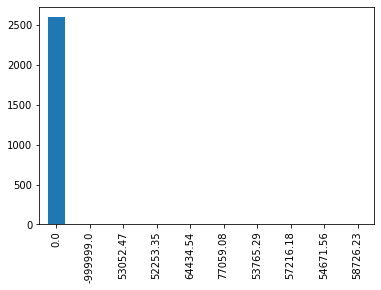

In [9]:
mydf['sales_per_day'].value_counts().head(10).plot.bar()

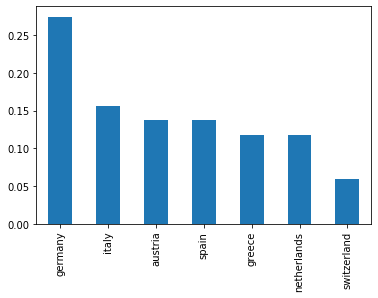

In [8]:
(mydf['country'].value_counts().head(10) / len(mydf)).plot.bar()
#This tells us the Germany has more sales per day

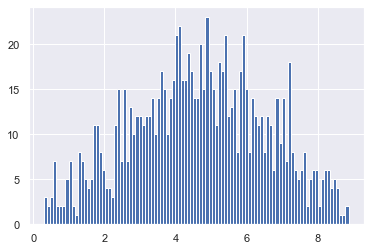

In [10]:
sns.set(style="darkgrid")
x = plt.hist(np.random.triangular(0, 5, 9, 1000), bins=100, linewidth=1)
plt.show()

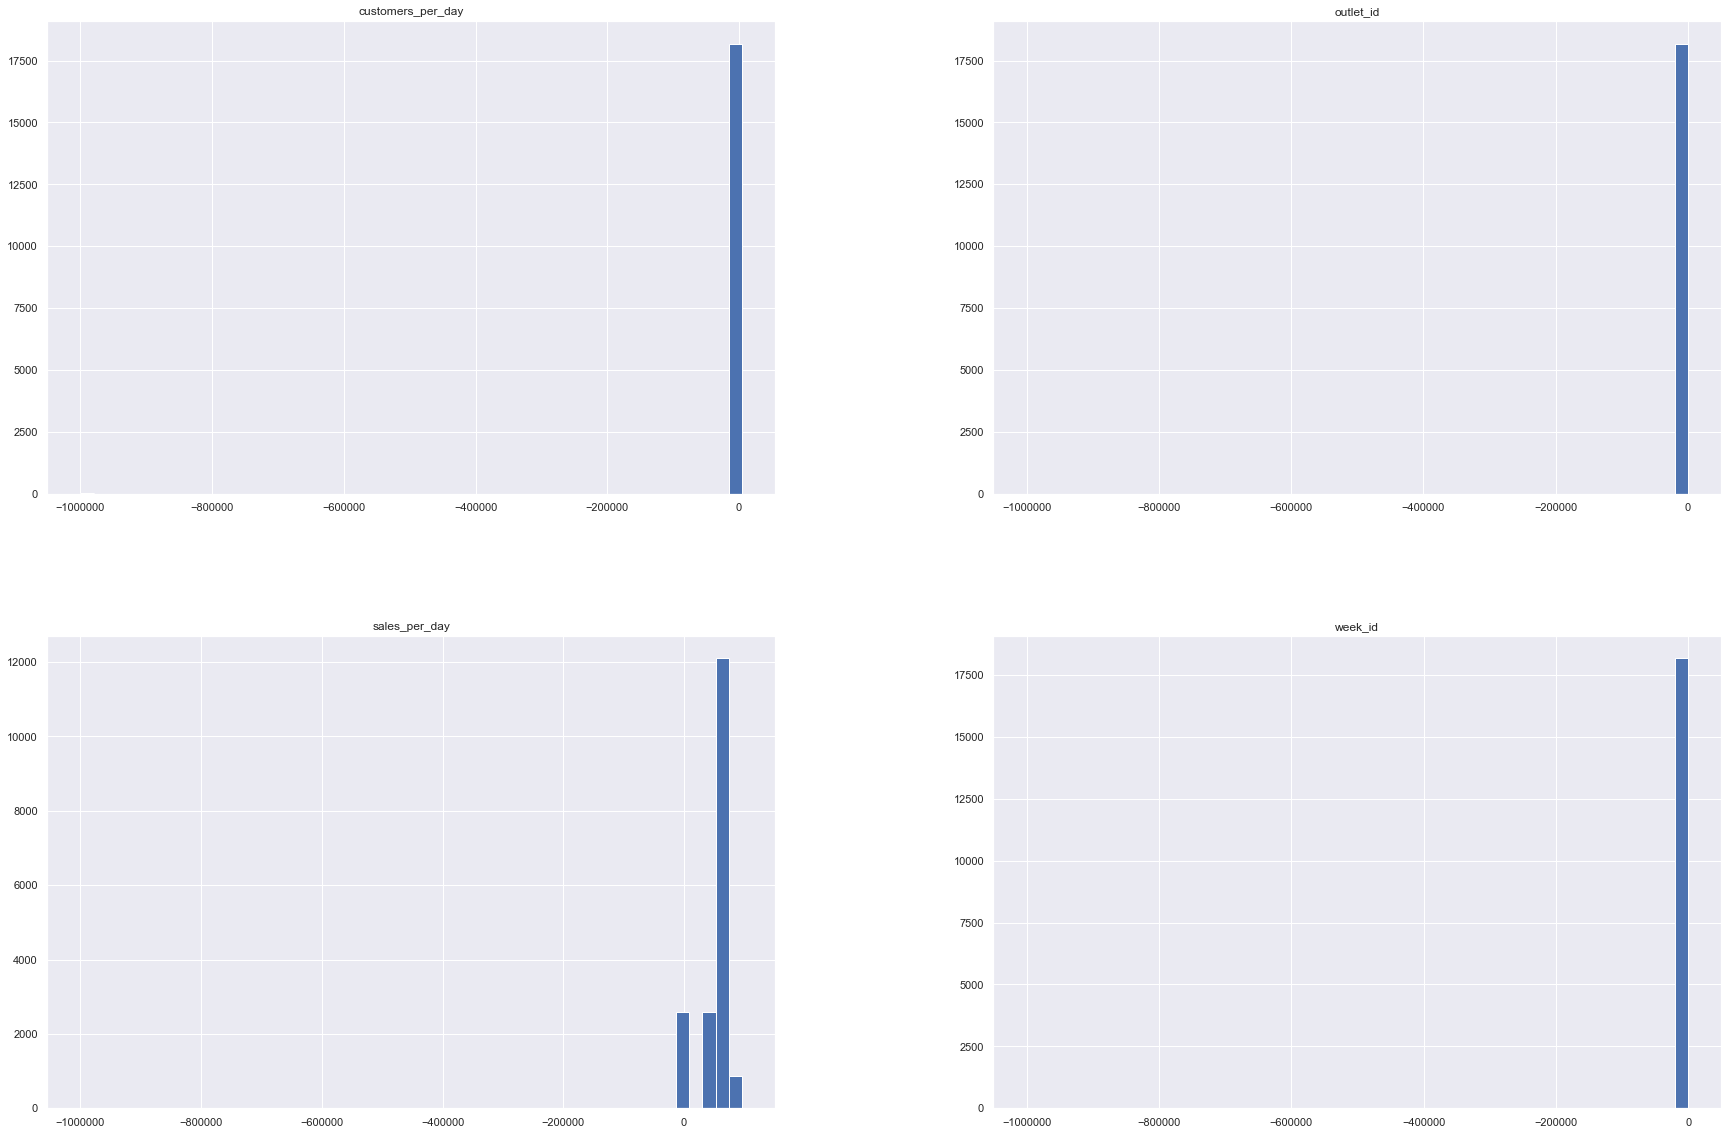

In [11]:
data_path = 'data.csv'
mydf = pd.read_csv(data_path, sep=';', index_col=0)
mydf.hist(bins=50, figsize=(30,20));

## Multivariate analysis and summary of the data
    
    Using more than one variable for data summary
    deriving colleration matrix
    
A correlation matrix is a table showing correlation coefficients between sets of variables. Each random variable (Xi) in the table is correlated with each of the other values in the table (Xj). This allows you to see which pairs have the highest correlation: (Cited: statisticshowto.datasciencecentral.com)

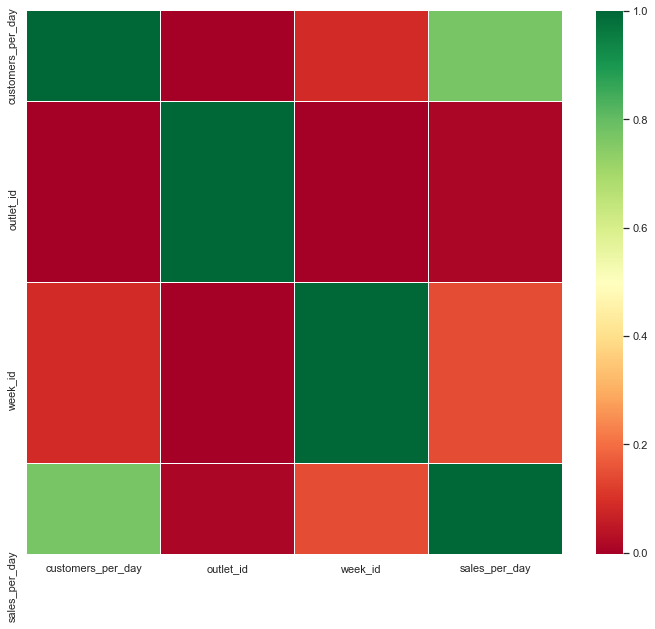

In [12]:
corrmat = mydf.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, cmap="RdYlGn", linewidths=0.1)

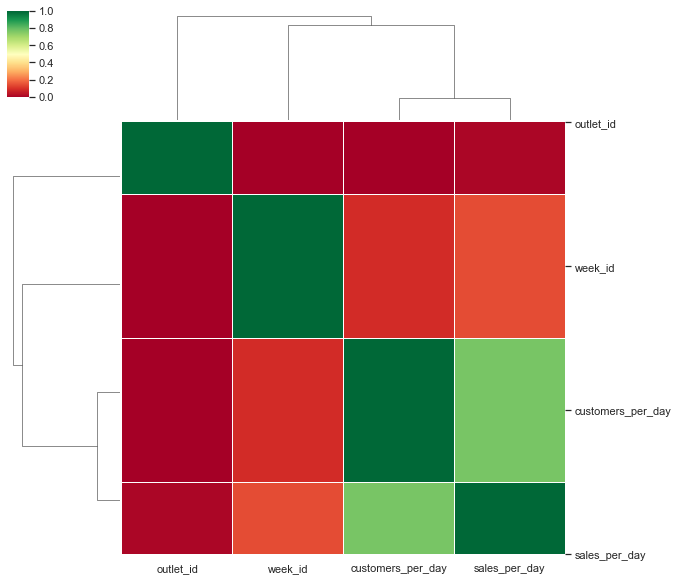

In [13]:
corrmat = mydf.corr(method='spearman')
cg = sns.clustermap(corrmat, cmap="RdYlGn", linewidths=0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
cg

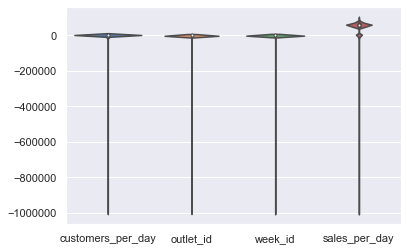

In [14]:
#Violin ploting
sns.violinplot(x=None, y=None, data=mydf, height=2)

/Users/reveal/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/reveal/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/reveal/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/reveal/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


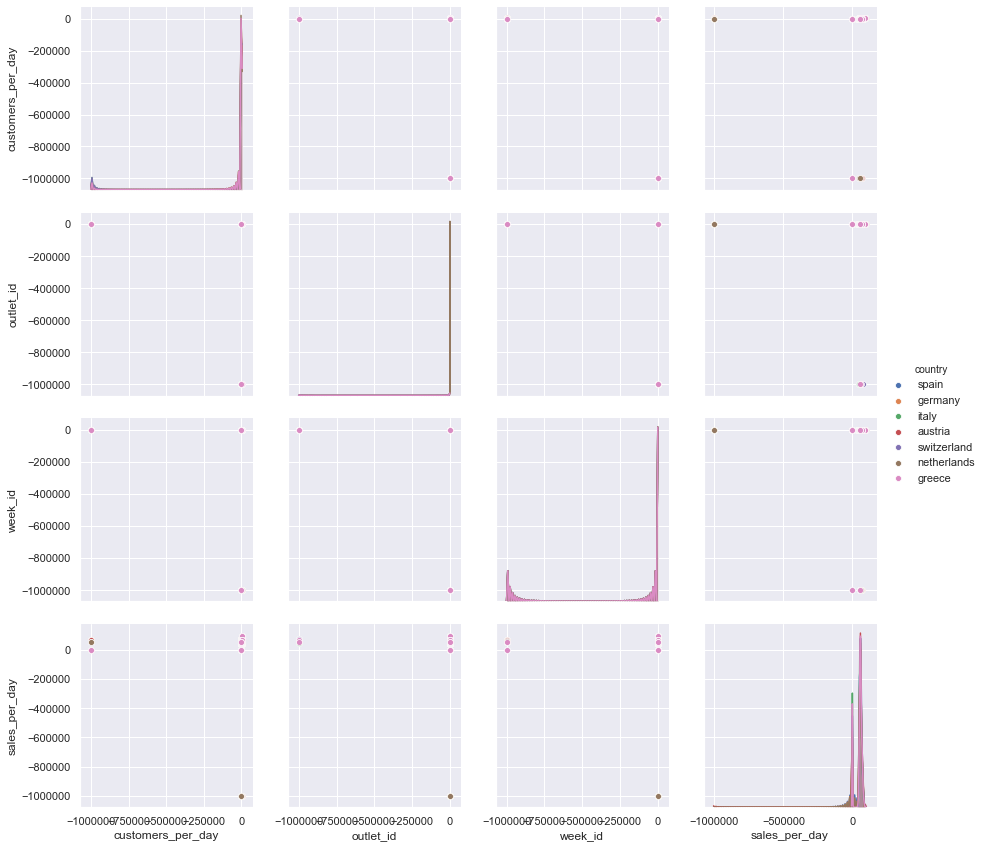

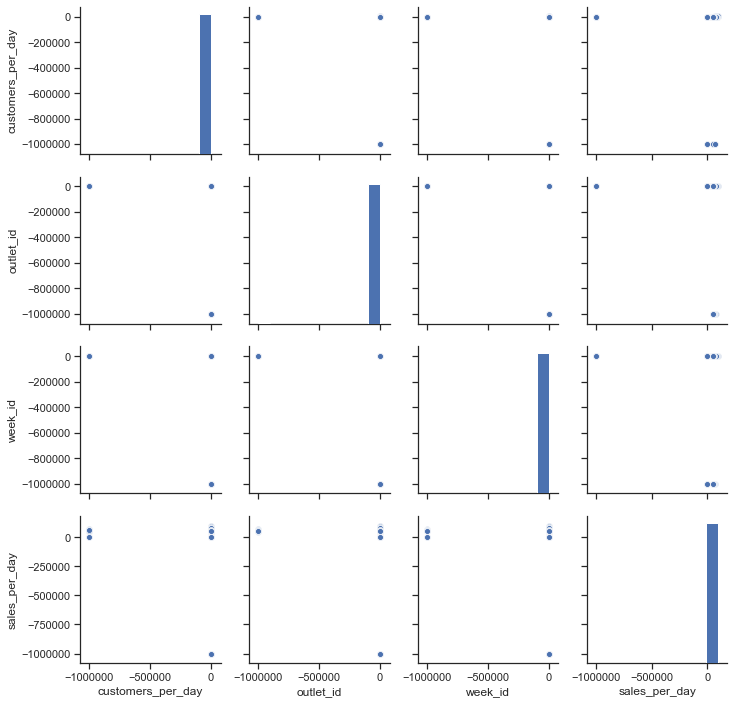

In [15]:
#Pair plot
sns.pairplot(mydf, hue="country", height=3)
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(mydf)
g

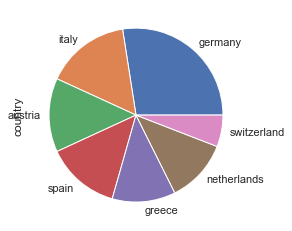

In [16]:
mydf['country'].value_counts().head(10).plot.pie()
# Unsquish the pie.
plt.gca().set_aspect('equal')

In [17]:
mydf.columns

Index(['country', 'currency', 'customers_per_day', 'outlet_id', 'week_id',
       'weekday', 'sales_per_day'],
      dtype='object')

## Checking for outliers

    An outlier is a data point in a data set that is distant from all other observations. A data point that lies outside the overall distribution of the dataset. (Cited: R..,Khandelwal, Sep.2018)
    
    An outlier could exist in a dataset due to
    1. Variability in the data
    2. An experimental measurement error
    3. What is the impact of an outlier?

    Causes serious issues for statistical analysis
    1. skew the data,
    2. significant impact on mean
    3. significant impact on standard deviation.
    
    How can we identify an outlier?
    1. using scatter plots
    2. using Z score
    3. using the IQR interquartile range
    
    Using Z score

    Formula for Z score = (Observation — Mean)/Standard Deviation
    z = (X — μ) / σ

In [18]:
# skewness
mydf.skew(axis = 0, skipna = True) 

customers_per_day   -37.316673
outlet_id           -40.631147
week_id             -33.679550
sales_per_day       -17.203168
dtype: float64

In [19]:
mydf.outlet_id

brand
MediaMarkt    100.0
Saturn         86.0
MediaMarkt    530.0
Saturn         17.0
MediaMarkt    164.0
              ...  
MediaMarkt    255.0
MediaMarkt     79.0
MediaMarkt     99.0
MediaMarkt     99.0
MediaMarkt    334.0
Name: outlet_id, Length: 18207, dtype: float64

In [20]:
# significant impact on mean
mydf.mean()

customers_per_day      259.351503
outlet_id             -301.265747
week_id               -852.575684
sales_per_day        50823.378059
dtype: float64

In [21]:
mydf.shape

(18207, 7)

In [22]:
#significant impact on standard deviation.
mydf.std()

customers_per_day    26758.789881
outlet_id            24590.138649
week_id              29643.403749
sales_per_day        31283.133925
dtype: float64

In [23]:
mydf.columns

Index(['country', 'currency', 'customers_per_day', 'outlet_id', 'week_id',
       'weekday', 'sales_per_day'],
      dtype='object')

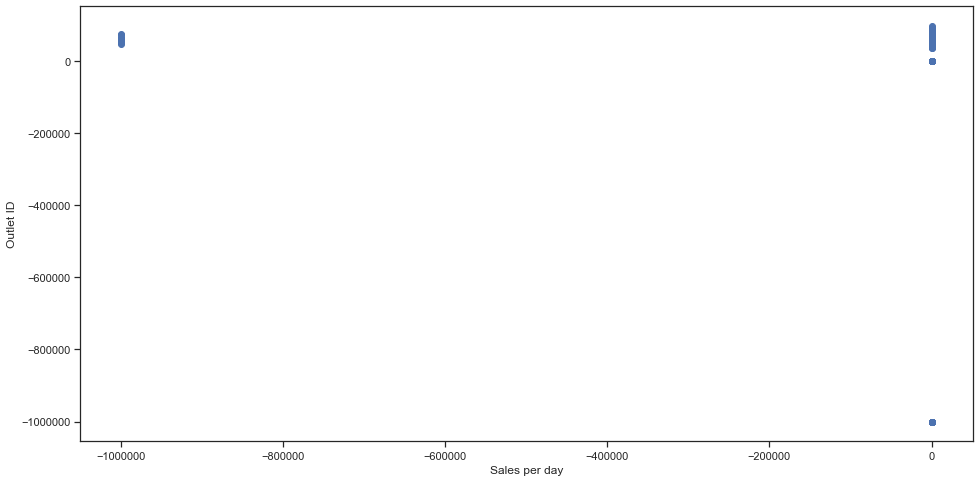

In [62]:
# How can we identify an outlier?
# using scatter plots
fig, tt = plt.subplots(figsize=(16,8))
tt.scatter(mydf['outlet_id'], mydf['sales_per_day'])
tt.set_xlabel('Sales per day')
tt.set_ylabel('Outlet ID')
plt.show()

In [ ]:
# using Z score
# Z score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed 
# or measured.

In [ ]:
# The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation 
# and Mean of the group of data points. Z-score is 
# finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution. (ref:https://towardsdatascience.com/)